In [2]:
pip install pandas


[notice] A new release of pip available: 22.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
import pandas as pd

In [51]:
sales_train = pd.read_csv("D:/Kaggle/SalesPrice/train.csv")

In [52]:
sales_train.shape

(1460, 81)

In [53]:
sales_train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [54]:
import numpy as np

sales_train.isna().sum().sum()




7829

In [8]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: matplotlib in c:\users\vaibh\appdata\local\programs\python\python310\lib\site-packages (3.9.1)




[notice] A new release of pip available: 22.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<BarContainer object of 81 artists>

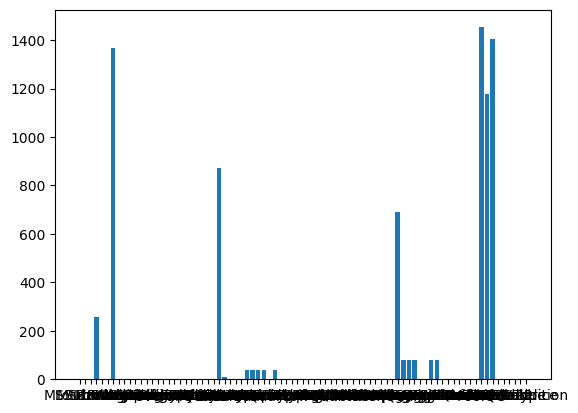

In [55]:
import matplotlib.pyplot as plt
plt.bar(sales_train.columns , sales_train.isna().sum(), width = 0.8)

In [56]:
x = pd.DataFrame(sales_train.isna().sum(), columns=["countna"])
x = x.loc[x["countna"]>0]
x

,countna
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


In [57]:
sales_train.groupby(["FireplaceQu"]).count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
FireplaceQu,,,,,,,,,,,,,,,,,,,,,
Ex,24,24,24,21,24,24,0,24,24,24,...,24,1,2,0,24,24,24,24,24,24
Fa,33,33,33,24,33,33,1,33,33,33,...,33,1,12,0,33,33,33,33,33,33
Gd,380,380,380,324,380,380,19,380,380,380,...,380,2,50,5,380,380,380,380,380,380
Po,20,20,20,15,20,20,1,20,20,20,...,20,1,10,2,20,20,20,20,20,20
TA,313,313,313,217,313,313,6,313,313,313,...,313,2,56,18,313,313,313,313,313,313


In [58]:
num_salestrain = sales_train.select_dtypes(include=np.number)

In [59]:
y = pd.DataFrame(num_salestrain.isna().sum(), columns=["countnanum"])
y = y.loc[y["countnanum"]>0]
mean = num_salestrain.mean(skipna=True)
mean
num_salestrain.fillna(mean,inplace=True)

num_salestrain.isna().sum().sum()

0

In [60]:
cat_salestrain = sales_train.select_dtypes(include=np.object_)
cat_salestrain = cat_salestrain.drop(["Alley","MasVnrType","PoolQC","Fence","MiscFeature"], axis = 1)
z = pd.DataFrame(cat_salestrain.isna().sum(), columns=["countnanum"])
z = z.loc[z["countnanum"]>0]
z

,countnanum
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1
FireplaceQu,690
GarageType,81
GarageFinish,81
GarageQual,81


In [61]:
cat_salestrain.groupby(["BsmtQual"]).count()
cat_salestrain["BsmtQual"] = cat_salestrain["BsmtQual"].replace({"Ex":1,"Fa":2,"Gd":3,"TA":4})
mode = cat_salestrain["BsmtQual"].mode()[0]
cat_salestrain["BsmtQual"] = cat_salestrain["BsmtQual"].fillna(mode)
cat_salestrain["BsmtQual"] = cat_salestrain["BsmtQual"].astype(int)
cat_salestrain["BsmtQual"]

C:\Users\vaibh\AppData\Local\Temp\ipykernel_19120\2579616958.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cat_salestrain["BsmtQual"] = cat_salestrain["BsmtQual"].replace({"Ex":1,"Fa":2,"Gd":3,"TA":4})


0       3
1       3
2       3
3       4
4       3
       ..
1455    3
1456    3
1457    4
1458    4
1459    4
Name: BsmtQual, Length: 1460, dtype: int32

In [62]:
cat_salestrain.groupby(["BsmtCond"]).count()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
BsmtCond,,,,,,,,,,,,,,,,,,,,,
Fa,45,45,45,45,45,45,45,45,45,45,...,45,45,17,38,38,38,38,45,45,45
Gd,65,65,65,65,65,65,65,65,65,65,...,65,65,41,63,63,63,63,65,65,65
Po,2,2,2,2,2,2,2,2,2,2,...,2,2,0,1,1,1,1,2,2,2
TA,1311,1311,1311,1311,1311,1311,1311,1311,1311,1311,...,1311,1311,703,1247,1247,1247,1247,1311,1311,1311


In [63]:
cat_salestrain["BsmtCond"] = cat_salestrain["BsmtCond"].replace({"Fa":1,"Gd":2,"Po":3,"TA":4})
mode = cat_salestrain["BsmtCond"].mode()[0]
cat_salestrain["BsmtCond"] = cat_salestrain["BsmtCond"].fillna(mode)
cat_salestrain["BsmtCond"] = cat_salestrain["BsmtCond"].astype(int)
cat_salestrain["BsmtCond"]

C:\Users\vaibh\AppData\Local\Temp\ipykernel_19120\3585436766.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cat_salestrain["BsmtCond"] = cat_salestrain["BsmtCond"].replace({"Fa":1,"Gd":2,"Po":3,"TA":4})


0       4
1       4
2       4
3       2
4       4
       ..
1455    4
1456    4
1457    2
1458    4
1459    4
Name: BsmtCond, Length: 1460, dtype: int32

In [64]:
cat_salestrain.groupby(["BsmtExposure"]).count()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
BsmtExposure,,,,,,,,,,,,,,,,,,,,,
Av,221,221,221,221,221,221,221,221,221,221,...,221,221,121,213,213,213,213,221,221,221
Gd,134,134,134,134,134,134,134,134,134,134,...,134,134,101,128,128,128,128,134,134,134
Mn,114,114,114,114,114,114,114,114,114,114,...,114,114,68,111,111,111,111,114,114,114
No,953,953,953,953,953,953,953,953,953,953,...,953,953,470,896,896,896,896,953,953,953


In [65]:
cat_salestrain["BsmtExposure"] = cat_salestrain["BsmtExposure"].replace({"Av":1,"Gd":2,"Mn":3,"No":4})
mode = cat_salestrain["BsmtExposure"].mode()[0]
cat_salestrain["BsmtExposure"] = cat_salestrain["BsmtExposure"].fillna(mode)
cat_salestrain["BsmtExposure"] = cat_salestrain["BsmtExposure"].astype(int)
cat_salestrain["BsmtExposure"]

C:\Users\vaibh\AppData\Local\Temp\ipykernel_19120\1453275686.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cat_salestrain["BsmtExposure"] = cat_salestrain["BsmtExposure"].replace({"Av":1,"Gd":2,"Mn":3,"No":4})


0       4
1       2
2       3
3       4
4       1
       ..
1455    4
1456    4
1457    4
1458    3
1459    4
Name: BsmtExposure, Length: 1460, dtype: int32

In [66]:
cat_salestrain.isna().sum()
z = pd.DataFrame(cat_salestrain.isna().sum(), columns=["countnanum"])
z = z.loc[z["countnanum"]>0]
z

,countnanum
BsmtFinType1,37
BsmtFinType2,38
Electrical,1
FireplaceQu,690
GarageType,81
GarageFinish,81
GarageQual,81
GarageCond,81


In [67]:
cat_salestrain.groupby(["BsmtFinType1"]).count()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
BsmtFinType1,,,,,,,,,,,,,,,,,,,,,
ALQ,220,220,220,220,220,220,220,220,220,220,...,220,220,120,209,209,209,209,220,220,220
BLQ,148,148,148,148,148,148,148,148,148,148,...,148,148,73,141,141,141,141,148,148,148
GLQ,418,418,418,418,418,418,418,418,418,418,...,418,418,261,408,408,408,408,418,418,418
LwQ,74,74,74,74,74,74,74,74,74,74,...,74,74,33,69,69,69,69,74,74,74
Rec,133,133,133,133,133,133,133,133,133,133,...,133,133,57,126,126,126,126,133,133,133
Unf,430,430,430,430,430,430,430,430,430,430,...,430,430,217,396,396,396,396,430,430,430


In [68]:
cat_salestrain["BsmtFinType1"] = cat_salestrain["BsmtFinType1"].replace({"ALQ":1,"BLQ":2,"GLQ":3,"LwQ":4,"Rec":5,"Unf":6})
mode = cat_salestrain["BsmtFinType1"].mode()[0]
cat_salestrain["BsmtFinType1"] = cat_salestrain["BsmtFinType1"].fillna(mode)
cat_salestrain["BsmtFinType1"] = cat_salestrain["BsmtFinType1"].astype(int)
cat_salestrain["BsmtFinType1"]

C:\Users\vaibh\AppData\Local\Temp\ipykernel_19120\2815440720.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cat_salestrain["BsmtFinType1"] = cat_salestrain["BsmtFinType1"].replace({"ALQ":1,"BLQ":2,"GLQ":3,"LwQ":4,"Rec":5,"Unf":6})


0       3
1       1
2       3
3       1
4       3
       ..
1455    6
1456    1
1457    3
1458    3
1459    2
Name: BsmtFinType1, Length: 1460, dtype: int32

In [69]:
cat_salestrain = cat_salestrain.drop(["BsmtFinType2","FireplaceQu"], axis=1)

In [70]:
cat_salestrain.groupby(["Electrical"]).count()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,CentralAir,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Electrical,,,,,,,,,,,,,,,,,,,,,
FuseA,94,94,94,94,94,94,94,94,94,94,...,94,94,94,81,81,81,81,94,94,94
FuseF,27,27,27,27,27,27,27,27,27,27,...,27,27,27,22,22,22,22,27,27,27
FuseP,3,3,3,3,3,3,3,3,3,3,...,3,3,3,2,2,2,2,3,3,3
Mix,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
SBrkr,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,...,1334,1334,1334,1272,1272,1272,1272,1334,1334,1334


In [71]:
cat_salestrain["Electrical"] = cat_salestrain["Electrical"].replace({"FuseA":1,"FuseF":2,"FuseP":3,"Mix":4,"SBrkr":5})
mode = cat_salestrain["Electrical"].mode()[0]
cat_salestrain["Electrical"] = cat_salestrain["Electrical"].fillna(mode)
cat_salestrain["Electrical"] = cat_salestrain["Electrical"].astype(int)
cat_salestrain["Electrical"]

C:\Users\vaibh\AppData\Local\Temp\ipykernel_19120\3658816683.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cat_salestrain["Electrical"] = cat_salestrain["Electrical"].replace({"FuseA":1,"FuseF":2,"FuseP":3,"Mix":4,"SBrkr":5})


0       5
1       5
2       5
3       5
4       5
       ..
1455    5
1456    5
1457    5
1458    1
1459    5
Name: Electrical, Length: 1460, dtype: int32

In [72]:
cat_salestrain.groupby(["Electrical"]).count()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,CentralAir,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Electrical,,,,,,,,,,,,,,,,,,,,,
1,94,94,94,94,94,94,94,94,94,94,...,94,94,94,81,81,81,81,94,94,94
2,27,27,27,27,27,27,27,27,27,27,...,27,27,27,22,22,22,22,27,27,27
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,2,2,2,2,3,3,3
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,1335,1335,1335,1335,1335,1335,1335,1335,1335,1335,...,1335,1335,1335,1273,1273,1273,1273,1335,1335,1335


In [73]:
cat_salestrain.groupby(["GarageType"]).count()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,CentralAir,Electrical,KitchenQual,Functional,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
GarageType,,,,,,,,,,,,,,,,,,,,,
2Types,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
Attchd,870,870,870,870,870,870,870,870,870,870,...,870,870,870,870,870,870,870,870,870,870
Basment,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
BuiltIn,88,88,88,88,88,88,88,88,88,88,...,88,88,88,88,88,88,88,88,88,88
CarPort,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
Detchd,387,387,387,387,387,387,387,387,387,387,...,387,387,387,387,387,387,387,387,387,387


In [74]:
cat_salestrain["GarageType"] = cat_salestrain["GarageType"].replace({"2Types":1,"Attchd":2,"Basment":3,"BuiltIn":4,"CarPort":5,"Detchd":6})
mode = cat_salestrain["GarageType"].mode()[0]
cat_salestrain["GarageType"] = cat_salestrain["GarageType"].fillna(mode)
cat_salestrain["GarageType"] = cat_salestrain["GarageType"].astype(int)
cat_salestrain["GarageType"]

C:\Users\vaibh\AppData\Local\Temp\ipykernel_19120\1379669235.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cat_salestrain["GarageType"] = cat_salestrain["GarageType"].replace({"2Types":1,"Attchd":2,"Basment":3,"BuiltIn":4,"CarPort":5,"Detchd":6})


0       2
1       2
2       2
3       6
4       2
       ..
1455    2
1456    2
1457    2
1458    2
1459    2
Name: GarageType, Length: 1460, dtype: int32

In [75]:
cat_salestrain.groupby(["GarageFinish"]).count()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
GarageFinish,,,,,,,,,,,,,,,,,,,,,
Fin,352,352,352,352,352,352,352,352,352,352,...,352,352,352,352,352,352,352,352,352,352
RFn,422,422,422,422,422,422,422,422,422,422,...,422,422,422,422,422,422,422,422,422,422
Unf,605,605,605,605,605,605,605,605,605,605,...,605,605,605,605,605,605,605,605,605,605


In [76]:
cat_salestrain["GarageFinish"] = cat_salestrain["GarageFinish"].replace({"Fin":1,"RFn":2,"Unf":3})
mode = cat_salestrain["GarageFinish"].mode()[0]
cat_salestrain["GarageFinish"] = cat_salestrain["GarageFinish"].fillna(mode)
cat_salestrain["GarageFinish"] = cat_salestrain["GarageFinish"].astype(int)
cat_salestrain["GarageFinish"]

C:\Users\vaibh\AppData\Local\Temp\ipykernel_19120\1650163640.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cat_salestrain["GarageFinish"] = cat_salestrain["GarageFinish"].replace({"Fin":1,"RFn":2,"Unf":3})


0       2
1       2
2       2
3       3
4       2
       ..
1455    2
1456    3
1457    2
1458    3
1459    1
Name: GarageFinish, Length: 1460, dtype: int32

In [77]:
cat_salestrain.groupby(["GarageQual"]).count()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageCond,PavedDrive,SaleType,SaleCondition
GarageQual,,,,,,,,,,,,,,,,,,,,,
Ex,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Fa,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
Gd,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
Po,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
TA,1311,1311,1311,1311,1311,1311,1311,1311,1311,1311,...,1311,1311,1311,1311,1311,1311,1311,1311,1311,1311


In [78]:
cat_salestrain["GarageQual"] = cat_salestrain["GarageQual"].replace({"Ex":1,"Fa":2,"Gd":3,"Po":4,"TA":5})
mode = cat_salestrain["GarageQual"].mode()[0]
cat_salestrain["GarageQual"] = cat_salestrain["GarageQual"].fillna(mode)
cat_salestrain["GarageQual"] = cat_salestrain["GarageQual"].astype(int)
cat_salestrain["GarageQual"]

C:\Users\vaibh\AppData\Local\Temp\ipykernel_19120\1290533669.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cat_salestrain["GarageQual"] = cat_salestrain["GarageQual"].replace({"Ex":1,"Fa":2,"Gd":3,"Po":4,"TA":5})


0       5
1       5
2       5
3       5
4       5
       ..
1455    5
1456    5
1457    5
1458    5
1459    5
Name: GarageQual, Length: 1460, dtype: int32

In [79]:
cat_salestrain.groupby(["GarageCond"]).count()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,PavedDrive,SaleType,SaleCondition
GarageCond,,,,,,,,,,,,,,,,,,,,,
Ex,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Fa,35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
Gd,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
Po,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
TA,1326,1326,1326,1326,1326,1326,1326,1326,1326,1326,...,1326,1326,1326,1326,1326,1326,1326,1326,1326,1326


In [80]:
cat_salestrain["GarageCond"] = cat_salestrain["GarageCond"].replace({"Ex":1,"Fa":2,"Gd":3,"Po":4,"TA":5})
mode = cat_salestrain["GarageCond"].mode()[0]
cat_salestrain["GarageCond"] = cat_salestrain["GarageCond"].fillna(mode)
cat_salestrain["GarageCond"] = cat_salestrain["GarageCond"].astype(int)
cat_salestrain["GarageCond"]

C:\Users\vaibh\AppData\Local\Temp\ipykernel_19120\3129246068.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cat_salestrain["GarageCond"] = cat_salestrain["GarageCond"].replace({"Ex":1,"Fa":2,"Gd":3,"Po":4,"TA":5})


0       5
1       5
2       5
3       5
4       5
       ..
1455    5
1456    5
1457    5
1458    5
1459    5
Name: GarageCond, Length: 1460, dtype: int32

In [81]:
cat_salestrain.groupby(["GarageQual"]).count()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageCond,PavedDrive,SaleType,SaleCondition
GarageQual,,,,,,,,,,,,,,,,,,,,,
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
3,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
4,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
5,1392,1392,1392,1392,1392,1392,1392,1392,1392,1392,...,1392,1392,1392,1392,1392,1392,1392,1392,1392,1392


In [82]:
z = pd.DataFrame(cat_salestrain.isna().sum(), columns=["countnanum"])
z = z.loc[z["countnanum"]>0]
z

,countnanum


In [83]:
cat_salestrain.isna().sum().sum()
num_salestrain.isna().sum().sum()

0

In [84]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [85]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()



In [86]:
cat_salestrain1 = pd.DataFrame(cat_salestrain)

In [87]:
cat_salestrain1.groupby(["MSZoning"]).count()
cat_salestrain["MSZoning"] = cat_salestrain["MSZoning"].replace({"C(all)":1,"FV":2,"RH":3,"RL":4,"RM":5})

In [88]:
cat_salestrain = cat_salestrain.drop(["Street"],axis=1)

In [89]:
cat_salestrain["LotShape"] = cat_salestrain["LotShape"].replace({"IR1":1,"IR2":2,"IR3":3,"Reg":4})

C:\Users\vaibh\AppData\Local\Temp\ipykernel_19120\3573518599.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cat_salestrain["LotShape"] = cat_salestrain["LotShape"].replace({"IR1":1,"IR2":2,"IR3":3,"Reg":4})


In [90]:
cat_salestrain.groupby(["LandContour"]).count()

,MSZoning,LotShape,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
LandContour,,,,,,,,,,,,,,,,,,,,,
Bnk,63,63,63,63,63,63,63,63,63,63,...,63,63,63,63,63,63,63,63,63,63
HLS,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
Low,36,36,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36
Lvl,1311,1311,1311,1311,1311,1311,1311,1311,1311,1311,...,1311,1311,1311,1311,1311,1311,1311,1311,1311,1311


In [91]:
cat_salestrain1 = cat_salestrain.select_dtypes(include=np.object_)

In [116]:
cat_salestrain2 = pd.DataFrame(cat_salestrain)

In [125]:
cat_salestrain2 = cat_salestrain2.drop(["MSZoning"],axis=1)

In [126]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = cat_salestrain2.select_dtypes(include=['object']).columns.tolist()

# Label Encoding
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    cat_salestrain2[column] = le.fit_transform(cat_salestrain2[column])
    label_encoders[column] = le

print(cat_salestrain2.head())

   LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
0         4            3          0          4          0             5   
1         4            3          0          2          0            24   
2         1            3          0          4          0             5   
3         1            3          0          0          0             6   
4         1            3          0          2          0            15   

   Condition1  Condition2  BldgType  HouseStyle  ...  Electrical  KitchenQual  \
0           2           2         0           5  ...           5            2   
1           1           2         0           2  ...           5            3   
2           2           2         0           5  ...           5            2   
3           2           2         0           5  ...           5            2   
4           2           2         0           5  ...           5            2   

   Functional  GarageType  GarageFinish  GarageQual  GarageCon

In [127]:
cat_salestrain2.isna().sum().sum()

0

In [101]:
cat_salestrain2 = cat_salestrain2.astype(object)

In [102]:
sales_train_final = pd.concat([cat_salestrain2.reset_index(drop=True),num_salestrain.reset_index(drop=True)], axis=1)

In [ ]:
pip install statsmodels



     ---------------------------------------- 9.8/9.8 MB 4.1 MB/s eta 0:00:00
     -------------------------------------- 233.9/233.9 kB 7.2 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [128]:
import statsmodels.api as sm

# Assuming df is your DataFrame and target_column is your target column

# Define the target variable and features
X = num_salestrain.drop('SalePrice', axis=1)
y = num_salestrain['SalePrice']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     282.0
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:20:07   Log-Likelihood:                -17324.
No. Observations:                1460   AIC:                         3.469e+04
Df Residuals:                    1437   BIC:                         3.482e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.128e+06   1.22e+05     -9.261   

In [ ]:
num_salestrain = num_salestrain.drop(["YrSold","MoSold","MiscVal","PoolArea","3SsnPorch","EnclosedPorch","OpenPorchSF","GarageArea","HalfBath","FullBath","BsmtHalfBath","LowQualFinSF","BsmtUnfSF","BsmtFinSF2","LotFrontage"], axis=1)

In [130]:
num_salestrain.shape

(1460, 23)

In [131]:
cat_salestrain2['SalePrice'] = num_salestrain['SalePrice'].values

In [132]:
import statsmodels.api as sm

cat_salestrain2 = cat_salestrain2.astype(int)

# Define the target variable and features
X = cat_salestrain2.drop('SalePrice', axis=1)
y = cat_salestrain2['SalePrice']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     81.57
Date:                Tue, 16 Jul 2024   Prob (F-statistic):          1.53e-305
Time:                        20:20:42   Log-Likelihood:                -17755.
No. Observations:                1460   AIC:                         3.558e+04
Df Residuals:                    1425   BIC:                         3.577e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.622e+05   2.64e+04      9.914

In [109]:
cat_salestrain2 = cat_salestrain2.astype(object)
cat_salestrain2 = cat_salestrain2.drop(["SalePrice"],axis=1)

In [110]:
cat_salestrain2['SalePrice'] = num_salestrain['SalePrice'].values

In [111]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming df is your DataFrame and target_column is your target column
categorical_columns = cat_salestrain2.select_dtypes(include=['object', 'category']).columns.tolist()

anova_results = {}
for column in categorical_columns:
    model = ols(f'SalePrice ~ C({column})', data=cat_salestrain2).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    anova_results[column] = anova_table['PR(>F)'][0]

# Display ANOVA p-values
anova_df = pd.DataFrame({
    'P-Value': anova_results
})
print(anova_df)

C:\Users\vaibh\AppData\Local\Temp\ipykernel_19120\3068701661.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  anova_results[column] = anova_table['PR(>F)'][0]
C:\Users\vaibh\AppData\Local\Temp\ipykernel_19120\3068701661.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  anova_results[column] = anova_table['PR(>F)'][0]
C:\Users\vaibh\AppData\Local\Temp\ipykernel_19120\3068701661.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]

                     P-Value
MSZoning        8.817634e-35
LotShape        6.447524e-25
LandContour     2.742217e-08
Utilities       5.847168e-01
LotConfig       3.163167e-06
LandSlope       1.413964e-01
Neighborhood   1.558600e-225
Condition1      8.904549e-08
Condition2      4.342566e-02
BldgType        2.056736e-10
HouseStyle      3.376777e-25
RoofStyle       3.653523e-17
RoofMatl        7.231445e-08
Exterior1st     2.586089e-43
Exterior2nd     4.842186e-43
ExterQual      1.439551e-204
ExterCond       5.106681e-07
Foundation      5.791895e-91
BsmtQual       2.078120e-194
BsmtCond        7.166578e-09
BsmtExposure    5.394238e-46
BsmtFinType1    3.598398e-66
Heating         7.534721e-04
HeatingQC       2.667062e-67
CentralAir      1.809506e-22
Electrical      1.641208e-18
KitchenQual    3.032213e-192
Functional      4.841697e-04
GarageType      2.578443e-56
GarageFinish   5.993319e-111
GarageQual      9.588016e-07
GarageCond      1.532279e-06
PavedDrive      1.803569e-18
SaleType      

C:\Users\vaibh\AppData\Local\Temp\ipykernel_19120\3068701661.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  anova_results[column] = anova_table['PR(>F)'][0]
C:\Users\vaibh\AppData\Local\Temp\ipykernel_19120\3068701661.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  anova_results[column] = anova_table['PR(>F)'][0]
C:\Users\vaibh\AppData\Local\Temp\ipykernel_19120\3068701661.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]

In [133]:
cat_salestrain2 = cat_salestrain2.drop(["LandSlope","Utilities"],axis=1)

In [134]:
cat_salestrain2

,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,...,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,4,3,4,5,2,2,0,5,1,1,...,2,6,2,2,5,5,2,8,4,208500
1,4,3,2,24,1,2,0,2,1,1,...,3,6,2,2,5,5,2,8,4,181500
2,1,3,4,5,2,2,0,5,1,1,...,2,6,2,2,5,5,2,8,4,223500
3,1,3,0,6,2,2,0,5,1,1,...,2,6,6,3,5,5,2,8,0,140000
4,1,3,2,15,2,2,0,5,1,1,...,2,6,2,2,5,5,2,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4,3,4,8,2,2,0,5,1,1,...,3,6,2,2,5,5,2,8,4,175000
1456,4,3,4,14,2,2,0,2,1,1,...,3,2,2,3,5,5,2,8,4,210000
1457,4,3,4,6,2,2,0,5,1,1,...,2,6,2,2,5,5,2,8,4,266500
1458,4,3,4,12,2,2,0,2,3,1,...,2,6,2,3,5,5,2,8,4,142125


In [135]:
import statsmodels.api as sm

cat_salestrain2 = cat_salestrain2.astype(int)

# Define the target variable and features
X = cat_salestrain2.drop('SalePrice', axis=1)
y = cat_salestrain2['SalePrice']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     86.12
Date:                Tue, 16 Jul 2024   Prob (F-statistic):          6.28e-306
Time:                        20:21:25   Log-Likelihood:                -17759.
No. Observations:                1460   AIC:                         3.558e+04
Df Residuals:                    1427   BIC:                         3.576e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.713e+05   2.62e+04     10.365

In [137]:
cat_salestrain2 = cat_salestrain2.drop(["SaleType","GarageQual","GarageType","Heating","BsmtCond","Foundation","ExterCond","Condition2","Condition1","LotConfig","LandContour"],axis=1)

In [138]:
cat_salestrain2.shape

(1460, 22)

In [139]:
sales_train_final = pd.concat([cat_salestrain2.reset_index(drop=True),num_salestrain.reset_index(drop=True)], axis=1)

In [140]:
sales_train_final

,LotShape,Neighborhood,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,BsmtQual,...,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,ScreenPorch,SalePrice
0,4,5,0,5,1,1,12,13,2,3,...,1,3,1,8,0,2003.0,2,0,0,208500
1,4,24,0,2,1,1,8,8,3,3,...,0,3,1,6,1,1976.0,2,298,0,181500
2,1,5,0,5,1,1,12,13,2,3,...,1,3,1,6,1,2001.0,2,0,0,223500
3,1,6,0,5,1,1,13,15,3,4,...,1,3,1,7,1,1998.0,3,0,0,140000
4,1,15,0,5,1,1,12,13,2,3,...,1,4,1,9,1,2000.0,3,192,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4,8,0,5,1,1,12,13,3,3,...,0,3,1,7,1,1999.0,2,0,0,175000
1456,4,14,0,2,1,1,9,10,3,3,...,1,3,1,7,2,1978.0,2,349,0,210000
1457,4,6,0,5,1,1,5,5,0,4,...,0,4,1,9,2,1941.0,1,0,0,266500
1458,4,12,0,2,3,1,8,8,3,4,...,1,2,1,5,0,1950.0,1,366,0,142125


In [141]:
sales_train_final.isna().sum().sum()

0

In [142]:
sales_train_final

,LotShape,Neighborhood,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,BsmtQual,...,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,ScreenPorch,SalePrice
0,4,5,0,5,1,1,12,13,2,3,...,1,3,1,8,0,2003.0,2,0,0,208500
1,4,24,0,2,1,1,8,8,3,3,...,0,3,1,6,1,1976.0,2,298,0,181500
2,1,5,0,5,1,1,12,13,2,3,...,1,3,1,6,1,2001.0,2,0,0,223500
3,1,6,0,5,1,1,13,15,3,4,...,1,3,1,7,1,1998.0,3,0,0,140000
4,1,15,0,5,1,1,12,13,2,3,...,1,4,1,9,1,2000.0,3,192,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4,8,0,5,1,1,12,13,3,3,...,0,3,1,7,1,1999.0,2,0,0,175000
1456,4,14,0,2,1,1,9,10,3,3,...,1,3,1,7,2,1978.0,2,349,0,210000
1457,4,6,0,5,1,1,5,5,0,4,...,0,4,1,9,2,1941.0,1,0,0,266500
1458,4,12,0,2,3,1,8,8,3,4,...,1,2,1,5,0,1950.0,1,366,0,142125


In [161]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df_encoded = pd.get_dummies(sales_train_final, drop_first=True)

# Define the target variable and features
X = df_encoded.drop(['SalePrice'], axis=1)
y = sales_train_final['SalePrice']
y = y.T.drop_duplicates().T

In [163]:
print(X.shape)
print(y.shape)

(1460, 43)
(1460, 1)


In [164]:
# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression model
print(model.summary())

# Make predictions
y_pred = model.predict(X)

# Optionally, evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              1260.
Date:                Tue, 16 Jul 2024   Prob (F-statistic):                        0.00
Time:                        20:42:15   Log-Likelihood:                         -17196.
No. Observations:                1460   AIC:                                  3.448e+04
Df Residuals:                    1417   BIC:                                  3.471e+04
Df Model:                          43                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [165]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 1120109483.879575
R^2 Score: 0.8539684684035956


In [166]:
sales_train_final.head(3)

,LotShape,Neighborhood,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,BsmtQual,...,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,ScreenPorch,SalePrice
0,4,5,0,5,1,1,12,13,2,3,...,1,3,1,8,0,2003.0,2,0,0,208500
1,4,24,0,2,1,1,8,8,3,3,...,0,3,1,6,1,1976.0,2,298,0,181500
2,1,5,0,5,1,1,12,13,2,3,...,1,3,1,6,1,2001.0,2,0,0,223500


In [167]:
sales_test = pd.read_csv("D:/Kaggle/SalesPrice/test.csv")

In [218]:
num_test = sales_test.select_dtypes(include = np.number)
cat_test = sales_test.select_dtypes(include = np.object_)

In [175]:
num_test.isna().sum()

Id                 0
MSSubClass         0
LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [176]:
num_test = num_test.drop(["YrSold","MoSold","MiscVal","PoolArea","3SsnPorch","EnclosedPorch","OpenPorchSF","GarageArea","HalfBath","FullBath","BsmtHalfBath","LowQualFinSF","BsmtUnfSF","BsmtFinSF2","LotFrontage"], axis=1)

In [177]:
num_test.isna().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea      15
BsmtFinSF1       1
TotalBsmtSF      1
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     2
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt     78
GarageCars       1
WoodDeckSF       0
ScreenPorch      0
dtype: int64

LotShape         0
Neighborhood     0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
BsmtQual         0
BsmtExposure     0
BsmtFinType1     0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageFinish     0
GarageCond       0
PavedDrive       0
SaleCondition    0
SalePrice        0
Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
WoodDeckSF       0
ScreenPorch      0
SalePrice        0
dtype: int64

In [219]:
cat_test = cat_test.drop(["LandSlope","Utilities"],axis=1)
cat_test = cat_test.drop(["SaleType","GarageQual","GarageType","Heating","BsmtCond","Foundation","ExterCond","Condition2","Condition1","LotConfig","LandContour"],axis=1)

In [220]:
cat_test = cat_test.drop(["Alley","MasVnrType","PoolQC","Fence","MiscFeature"], axis = 1)
cat_test = cat_test.drop(["BsmtFinType2","FireplaceQu"], axis=1)
cat_test = cat_test.drop(["MSZoning"], axis=1)

In [221]:

cat_test.isna().sum()

Street            0
LotShape          0
Neighborhood      0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       1
Exterior2nd       1
ExterQual         0
BsmtQual         44
BsmtExposure     44
BsmtFinType1     42
HeatingQC         0
CentralAir        0
Electrical        0
KitchenQual       1
Functional        2
GarageFinish     78
GarageCond       78
PavedDrive        0
SaleCondition     0
dtype: int64

In [188]:
mean = num_test.mean(skipna=True)
mean

Id              2190.000000
MSSubClass        57.378341
LotArea         9819.161069
OverallQual        6.078821
OverallCond        5.553804
YearBuilt       1971.357779
YearRemodAdd    1983.662783
MasVnrArea       100.709141
BsmtFinSF1       439.203704
TotalBsmtSF     1046.117970
1stFlrSF        1156.534613
2ndFlrSF         325.967786
GrLivArea       1486.045922
BsmtFullBath       0.434454
BedroomAbvGr       2.854010
KitchenAbvGr       1.042495
TotRmsAbvGrd       6.385195
Fireplaces         0.581220
GarageYrBlt     1977.721217
GarageCars         1.766118
WoodDeckSF        93.174777
ScreenPorch       17.064428
dtype: float64

In [189]:
num_test.fillna(mean,inplace=True)

In [192]:
num_test.isna().sum().sum()
num_test.shape

(1459, 22)

In [224]:
cat_test.isna().sum()

Street            0
LotShape          0
Neighborhood      0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       1
Exterior2nd       1
ExterQual         0
BsmtQual         44
BsmtExposure     44
BsmtFinType1     42
HeatingQC         0
CentralAir        0
Electrical        0
KitchenQual       1
Functional        2
GarageFinish     78
GarageCond       78
PavedDrive        0
SaleCondition     0
dtype: int64

In [225]:
cat_test["BsmtQual"] = cat_test["BsmtQual"].replace({"Ex":1,"Fa":2,"Gd":3,"TA":4})
mode = cat_test["BsmtQual"].mode()[0]
cat_test["BsmtQual"] = cat_test["BsmtQual"].fillna(mode)
cat_test["BsmtQual"] = cat_test["BsmtQual"].astype(int)
cat_test["BsmtQual"]

C:\Users\vaibh\AppData\Local\Temp\ipykernel_19120\1323223637.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cat_test["BsmtQual"] = cat_test["BsmtQual"].replace({"Ex":1,"Fa":2,"Gd":3,"TA":4})


0       4
1       4
2       3
3       4
4       3
       ..
1454    4
1455    4
1456    4
1457    3
1458    3
Name: BsmtQual, Length: 1459, dtype: int32

In [226]:
cat_test.isna().sum().sum()

247

In [227]:
cat_test["BsmtExposure"] = cat_test["BsmtExposure"].replace({"Av":1,"Gd":2,"Mn":3,"No":4})
mode = cat_test["BsmtExposure"].mode()[0]
cat_test["BsmtExposure"] = cat_test["BsmtExposure"].fillna(mode)
cat_test["BsmtExposure"] = cat_test["BsmtExposure"].astype(int)
cat_test["BsmtExposure"]

C:\Users\vaibh\AppData\Local\Temp\ipykernel_19120\2543036313.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cat_test["BsmtExposure"] = cat_test["BsmtExposure"].replace({"Av":1,"Gd":2,"Mn":3,"No":4})


0       4
1       4
2       4
3       4
4       4
       ..
1454    4
1455    4
1456    4
1457    1
1458    1
Name: BsmtExposure, Length: 1459, dtype: int32

In [228]:
cat_test["BsmtFinType1"] = cat_test["BsmtFinType1"].replace({"ALQ":1,"BLQ":2,"GLQ":3,"LwQ":4,"Rec":5,"Unf":6})
mode = cat_test["BsmtFinType1"].mode()[0]
cat_test["BsmtFinType1"] = cat_test["BsmtFinType1"].fillna(mode)
cat_test["BsmtFinType1"] = cat_test["BsmtFinType1"].astype(int)
cat_test["BsmtFinType1"]

C:\Users\vaibh\AppData\Local\Temp\ipykernel_19120\3561027534.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cat_test["BsmtFinType1"] = cat_test["BsmtFinType1"].replace({"ALQ":1,"BLQ":2,"GLQ":3,"LwQ":4,"Rec":5,"Unf":6})


0       5
1       1
2       3
3       3
4       1
       ..
1454    6
1455    5
1456    1
1457    3
1458    4
Name: BsmtFinType1, Length: 1459, dtype: int32

In [250]:
cat_test["GarageFinish"] = cat_test["GarageFinish"].replace({"Fin":1,"RFn":2,"Unf":3})
mode = cat_test["GarageFinish"].mode()[0]
cat_test["GarageFinish"] = cat_test["GarageFinish"].fillna(mode)
cat_test["GarageFinish"] = cat_test["GarageFinish"].astype(int)
cat_test["GarageFinish"]

C:\Users\vaibh\AppData\Local\Temp\ipykernel_19120\1031833773.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cat_test["GarageFinish"] = cat_test["GarageFinish"].replace({"Fin":1,"RFn":2,"Unf":3})


0       3
1       3
2       1
3       1
4       2
       ..
1454    3
1455    3
1456    3
1457    3
1458    1
Name: GarageFinish, Length: 1459, dtype: int32

In [231]:
cat_test["GarageCond"] = cat_test["GarageCond"].replace({"Ex":1,"Fa":2,"Gd":3,"Po":4,"TA":5})
mode = cat_test["GarageCond"].mode()[0]
cat_test["GarageCond"] = cat_test["GarageCond"].fillna(mode)
cat_test["GarageCond"] = cat_test["GarageCond"].astype(int)
cat_test["GarageCond"]

0       5
1       5
2       5
3       5
4       5
       ..
1454    5
1455    5
1456    5
1457    5
1458    5
Name: GarageCond, Length: 1459, dtype: int32

In [232]:
cat_test.groupby(["KitchenQual"]).count()

,Street,LotShape,Neighborhood,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,...,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,Electrical,Functional,GarageFinish,GarageCond,PavedDrive,SaleCondition
KitchenQual,,,,,,,,,,,,,,,,,,,,,
Ex,105,105,105,105,105,105,105,105,105,105,...,105,105,105,105,105,105,104,105,105,105
Fa,31,31,31,31,31,31,31,30,30,31,...,31,31,31,31,31,30,24,31,31,31
Gd,565,565,565,565,565,565,565,565,565,565,...,565,565,565,565,565,565,548,565,565,565
TA,757,757,757,757,757,757,757,757,757,757,...,757,757,757,757,757,756,704,757,757,757


In [236]:
cat_test["KitchenQual"] = cat_test["KitchenQual"].replace({"Ex":0,"Fa":1,"Gd":2,"TA":3})
mode = cat_test["KitchenQual"].mode()[0]
cat_test["KitchenQual"] = cat_test["KitchenQual"].fillna(mode)
cat_test["KitchenQual"] = cat_test["KitchenQual"].astype(int)
cat_test["KitchenQual"]

0       3
1       2
2       3
3       2
4       2
       ..
1454    3
1455    3
1456    3
1457    3
1458    3
Name: KitchenQual, Length: 1459, dtype: int32

In [237]:
cat_test.groupby(["Functional"]).count()

,Street,LotShape,Neighborhood,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,...,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,Electrical,KitchenQual,GarageFinish,GarageCond,PavedDrive,SaleCondition
Functional,,,,,,,,,,,,,,,,,,,,,
Maj1,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
Maj2,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,3,4,4,4
Min1,34,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,32,34,34,34
Min2,36,36,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,31,36,36,36
Mod,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,19,20,20,20
Sev,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
Typ,1357,1357,1357,1357,1357,1357,1357,1356,1356,1357,...,1357,1357,1357,1357,1357,1357,1289,1357,1357,1357


In [241]:
cat_test["Functional"] = cat_test["Functional"].replace({"Maj1":0,"Maj2":1,"Min1":2,"Min2":3,"Mod":4,"Sev":5,"Typ":6})
mode = cat_test["Functional"].mode()[0]
cat_test["Functional"] = cat_test["Functional"].fillna(mode)
cat_test["Functional"] = cat_test["Functional"].astype(int)
cat_test["Functional"]

0       6
1       6
2       6
3       6
4       6
       ..
1454    6
1455    6
1456    6
1457    6
1458    6
Name: Functional, Length: 1459, dtype: int32

In [215]:
sales_train_final.groupby(["Functional"]).count()

,LotShape,Neighborhood,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,BsmtQual,...,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,ScreenPorch,SalePrice
Functional,,,,,,,,,,,,,,,,,,,,,
0,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
1,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
2,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
3,34,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34
4,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
5,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6,1360,1360,1360,1360,1360,1360,1360,1360,1360,1360,...,1360,1360,1360,1360,1360,1360,1360,1360,1360,1360


In [233]:
sales_train.groupby(["KitchenQual"]).count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
KitchenQual,,,,,,,,,,,,,,,,,,,,,
Ex,100,100,100,94,100,100,3,100,100,100,...,100,2,8,0,100,100,100,100,100,100
Fa,39,39,39,35,39,39,6,39,39,39,...,39,0,7,4,39,39,39,39,39,39
Gd,586,586,586,471,586,586,34,586,586,586,...,586,4,73,12,586,586,586,586,586,586
TA,735,735,735,601,735,735,48,735,735,735,...,735,1,193,38,735,735,735,735,735,735


In [234]:
sales_train_final.groupby(["KitchenQual"]).count()

,LotShape,Neighborhood,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,BsmtQual,...,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,ScreenPorch,SalePrice
KitchenQual,,,,,,,,,,,,,,,,,,,,,
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
2,586,586,586,586,586,586,586,586,586,586,...,586,586,586,586,586,586,586,586,586,586
3,735,735,735,735,735,735,735,735,735,735,...,735,735,735,735,735,735,735,735,735,735


In [238]:
sales_train.groupby(["Functional"]).count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Functional,,,,,,,,,,,,,,,,,,,,,
Maj1,14,14,14,12,14,14,0,14,14,14,...,14,0,4,0,14,14,14,14,14,14
Maj2,5,5,5,5,5,5,0,5,5,5,...,5,0,0,0,5,5,5,5,5,5
Min1,31,31,31,24,31,31,1,31,31,31,...,31,0,16,4,31,31,31,31,31,31
Min2,34,34,34,28,34,34,7,34,34,34,...,34,0,8,2,34,34,34,34,34,34
Mod,15,15,15,14,15,15,1,15,15,15,...,15,0,3,4,15,15,15,15,15,15
Sev,1,1,1,0,1,1,0,1,1,1,...,1,0,0,0,1,1,1,1,1,1
Typ,1360,1360,1360,1118,1360,1360,82,1360,1360,1360,...,1360,7,250,44,1360,1360,1360,1360,1360,1360


In [239]:
sales_train_final.groupby(["Functional"]).count()

,LotShape,Neighborhood,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,BsmtQual,...,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,ScreenPorch,SalePrice
Functional,,,,,,,,,,,,,,,,,,,,,
0,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
1,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
2,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
3,34,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34
4,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
5,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6,1360,1360,1360,1360,1360,1360,1360,1360,1360,1360,...,1360,1360,1360,1360,1360,1360,1360,1360,1360,1360


In [242]:
sales_train.groupby(["Exterior1st"]).count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Exterior1st,,,,,,,,,,,,,,,,,,,,,
AsbShng,20,20,20,19,20,20,5,20,20,20,...,20,0,7,0,20,20,20,20,20,20
AsphShn,1,1,1,1,1,1,0,1,1,1,...,1,0,0,0,1,1,1,1,1,1
BrkComm,2,2,2,2,2,2,0,2,2,2,...,2,0,0,0,2,2,2,2,2,2
BrkFace,50,50,50,41,50,50,3,50,50,50,...,50,0,13,1,50,50,50,50,50,50
CBlock,1,1,1,1,1,1,0,1,1,1,...,1,0,0,0,1,1,1,1,1,1
CemntBd,61,61,61,54,61,61,0,61,61,61,...,61,0,6,1,61,61,61,61,61,61
HdBoard,222,222,222,160,222,222,1,222,222,222,...,222,1,67,12,222,222,222,222,222,222
ImStucc,1,1,1,1,1,1,0,1,1,1,...,1,0,1,0,1,1,1,1,1,1
MetalSd,220,220,220,189,220,220,30,220,220,220,...,220,0,53,13,220,220,220,220,220,220


In [243]:
sales_train_final.groupby(["Exterior1st"]).count()

,LotShape,Neighborhood,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior2nd,ExterQual,BsmtQual,BsmtExposure,...,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,ScreenPorch,SalePrice
Exterior1st,,,,,,,,,,,,,,,,,,,,,
0,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
3,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,61,61,61,61,61,61,61,61,61,61,...,61,61,61,61,61,61,61,61,61,61
6,222,222,222,222,222,222,222,222,222,222,...,222,222,222,222,222,222,222,222,222,222
7,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
8,220,220,220,220,220,220,220,220,220,220,...,220,220,220,220,220,220,220,220,220,220


In [245]:
cat_test.groupby(["Exterior1st"]).count()

,Street,LotShape,Neighborhood,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior2nd,ExterQual,BsmtQual,...,BsmtFinType1,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageFinish,GarageCond,PavedDrive,SaleCondition
Exterior1st,,,,,,,,,,,,,,,,,,,,,
AsbShng,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,20,24,24,24
AsphShn,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
BrkComm,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
BrkFace,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,35,37,37,37
CBlock,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
CemntBd,65,65,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,58,65,65,65
HdBoard,220,220,220,220,220,220,220,220,220,220,...,220,220,220,220,220,220,216,220,220,220
MetalSd,230,230,230,230,230,230,230,230,230,230,...,230,230,230,230,230,230,219,230,230,230
Plywood,113,113,113,113,113,113,113,113,113,113,...,113,113,113,113,113,113,108,113,113,113


In [246]:
cat_test["Exterior1st"] = cat_test["Exterior1st"].fillna(0)

In [247]:
cat_test["Exterior2nd"] = cat_test["Exterior2nd"].fillna(0)

In [252]:
cat_test.isna().sum().sum()

0

In [262]:
cat_test["Electrical"] = cat_test["Electrical"].replace({"FuseA":1,"FuseF":2,"FuseP":3,"Mix":4,"SBrkr":5})
mode = cat_test["Electrical"].mode()[0]
cat_test["Electrical"] = cat_test["Electrical"].fillna(mode)
cat_test["Electrical"] = cat_test["Electrical"].astype(int)
cat_test["Electrical"]

C:\Users\vaibh\AppData\Local\Temp\ipykernel_19120\2326594894.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cat_test["Electrical"] = cat_test["Electrical"].replace({"FuseA":1,"FuseF":2,"FuseP":3,"Mix":4,"SBrkr":5})


0       5
1       5
2       5
3       5
4       5
       ..
1454    5
1455    5
1456    5
1457    5
1458    5
Name: Electrical, Length: 1459, dtype: int32

In [263]:
cat_test.isna().sum()

Street           0
LotShape         0
Neighborhood     0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
BsmtQual         0
BsmtExposure     0
BsmtFinType1     0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageFinish     0
GarageCond       0
PavedDrive       0
SaleCondition    0
dtype: int64

In [269]:
categorical_columns = cat_test.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'HeatingQC',
 'CentralAir',
 'PavedDrive',
 'SaleCondition']

In [272]:
cat_test["Exterior1st"] = cat_test["Exterior1st"].replace({0:"VinylSd"})

In [274]:
cat_test["Exterior2nd"] = cat_test["Exterior2nd"].replace({0:"VinylSd"})

In [276]:
cat_test.groupby(["Exterior2nd"]).count()
cat_test.groupby(["Exterior1st"]).count()

,Street,LotShape,Neighborhood,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior2nd,ExterQual,BsmtQual,...,BsmtFinType1,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageFinish,GarageCond,PavedDrive,SaleCondition
Exterior1st,,,,,,,,,,,,,,,,,,,,,
AsbShng,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
AsphShn,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
BrkComm,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
BrkFace,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37
CBlock,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
CemntBd,65,65,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
HdBoard,220,220,220,220,220,220,220,220,220,220,...,220,220,220,220,220,220,220,220,220,220
MetalSd,230,230,230,230,230,230,230,230,230,230,...,230,230,230,230,230,230,230,230,230,230
Plywood,113,113,113,113,113,113,113,113,113,113,...,113,113,113,113,113,113,113,113,113,113


In [277]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = cat_test.select_dtypes(include=['object']).columns.tolist()

# Label Encoding
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    cat_test[column] = le.fit_transform(cat_test[column])
    label_encoders[column] = le

print(cat_test.head())

   Street  LotShape  Neighborhood  BldgType  HouseStyle  RoofStyle  RoofMatl  \
0       1         3            12         0           2          1         0   
1       1         0            12         0           2          3         0   
2       1         0             8         0           4          1         0   
3       1         0             8         0           4          1         0   
4       1         0            22         4           2          1         0   

   Exterior1st  Exterior2nd  ExterQual  ...  BsmtFinType1  HeatingQC  \
0           10           12          3  ...             5          4   
1           11           13          3  ...             1          4   
2           10           12          3  ...             3          2   
3           10           12          3  ...             3          0   
4            6            6          2  ...             1          0   

   CentralAir  Electrical  KitchenQual  Functional  GarageFinish  GarageCond  \
0     

In [278]:
cat_test = cat_test.astype(int)

In [279]:
sales_test_final = pd.concat([cat_test.reset_index(drop=True), num_test.reset_index(drop=True)], axis=1)

In [281]:
sales_test_final.isna().sum().sum()

0

In [287]:
sales_test_final

,Street,LotShape,Neighborhood,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,...,GrLivArea,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,ScreenPorch
0,1,3,12,0,2,1,0,10,12,3,...,896,0.0,2,1,5,0,1961.000000,1.0,140,120
1,1,0,12,0,2,3,0,11,13,3,...,1329,0.0,3,1,6,0,1958.000000,1.0,393,0
2,1,0,8,0,4,1,0,10,12,3,...,1629,0.0,3,1,6,1,1997.000000,2.0,212,0
3,1,0,8,0,4,1,0,10,12,3,...,1604,0.0,3,1,7,1,1998.000000,2.0,360,0
4,1,0,22,4,2,1,0,6,6,2,...,1280,0.0,2,1,5,0,1992.000000,2.0,0,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1,3,10,3,4,1,0,5,5,3,...,1092,0.0,3,1,5,0,1977.721217,0.0,0,0
1455,1,3,10,4,4,1,0,5,5,3,...,1092,0.0,3,1,6,0,1970.000000,1.0,0,0
1456,1,3,11,0,2,1,0,10,12,3,...,1224,1.0,4,1,7,1,1960.000000,2.0,474,0
1457,1,3,11,0,5,1,0,6,14,3,...,970,0.0,3,1,6,0,1977.721217,0.0,80,0


In [292]:
sales_test_final = sales_test_final.drop(["Street"],axis=1)

In [294]:
y_final_pred = model.predict(sales_test_final)

In [304]:
y_pred2 = pd.DataFrame()
y_pred2["SalePrice"] = pd.DataFrame(y_final_pred)
y_pred2

,SalePrice
0,103304.224060
1,156661.426579
2,164485.171077
3,183654.957933
4,191859.237121
...,...
1454,55435.577275
1455,55737.770071
1456,153743.662561
1457,107788.731919


In [306]:
salesprice = pd.DataFrame([sales_test["Id"],y_pred2["SalePrice"]])

In [309]:
salesprice = salesprice.T

In [310]:
salesprice["Id"] = salesprice["Id"].astype(int)

In [311]:
salesprice

,Id,SalePrice
0,1461,103304.224060
1,1462,156661.426579
2,1463,164485.171077
3,1464,183654.957933
4,1465,191859.237121
...,...,...
1454,2915,55435.577275
1455,2916,55737.770071
1456,2917,153743.662561
1457,2918,107788.731919


In [315]:
salesprice.to_csv("salesprice", index = False)

In [316]:
salesprice.to_csv("salesprice.csv", index = False)

In [317]:
salesprice

,Id,SalePrice
0,1461,103304.224060
1,1462,156661.426579
2,1463,164485.171077
3,1464,183654.957933
4,1465,191859.237121
...,...,...
1454,2915,55435.577275
1455,2916,55737.770071
1456,2917,153743.662561
1457,2918,107788.731919


In [319]:
pip install xgboost

     -------------------------------------- 124.9/124.9 MB 4.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [324]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'sales_train_final' is your DataFrame and 'SalePrice' is your target column
# Encode categorical variables and handle missing values
df_encoded = pd.get_dummies(sales_train_final, drop_first=True)

# Define the target variable and features
X = df_encoded.drop('SalePrice', axis=1)
y = df_encoded['SalePrice']

print(X.shape)

y = y.T.drop_duplicates().T
print(y.shape)

(1460, 43)
(1460, 1)


In [328]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the XGBoost regressor
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_boost = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_boost)
r2 = r2_score(y_test, y_pred_boost)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
y_boost = model.predict(sales_test_final)

Mean Squared Error: 712222814.0362514
R^2 Score: 0.9071456789970398


In [329]:
y_boost

array([131053.54, 165528.56, 178832.25, ..., 187293.73, 126299.93,
       223133.75], dtype=float32)

In [330]:
y_pred_boost = pd.DataFrame()
y_pred_boost["SalePrice"] = pd.DataFrame(y_boost)
y_pred_boost

,SalePrice
0,131053.539062
1,165528.562500
2,178832.250000
3,192055.234375
4,194485.859375
...,...
1454,90085.109375
1455,88658.773438
1456,187293.734375
1457,126299.929688


In [336]:
sp_boost = pd.DataFrame([sales_test["Id"],y_pred_boost["SalePrice"]])
sp_boost = sp_boost.T
sp_boost["Id"] = sp_boost["Id"].astype(int)

In [338]:
sp_boost.to_csv("sp_boost.csv", index=False)